# Cryptocurrency Covariance Analysis

In [1]:
import os, sys
import pathlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from pylab import rcParams
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

In [2]:
feature_type = 'volatility_pcnt'

In [3]:
feature_list = ['symbol','pr_count','issues_count','commit_add_sum','commit_del_sum','commit_count','star_count','close','high','low','open','usd_market_cap','usd_volume']

In [4]:
rcParams['figure.figsize'] = 15, 12

### Load Currency Price Histories

In [5]:
def show_correlation_matrix(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Coin Correlation Matrix')
    labels=[x.split('_',1)[0] for x in df.columns.values]
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_xticklabels(labels,fontsize=10, rotation=90)
    ax1.set_yticks(np.arange(len(labels)))
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    fig.set_size_inches(18.5, 18.5)
    plt.show()

In [6]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [7]:
def generate_clusters(timeSeries):
    timeSeries = timeSeries.replace([np.inf, -np.inf, np.nan], 0.001)

    z_euclidean = hac.linkage(timeSeries, method='ward', metric='euclidean'),"Euclidean"
#     z_minkowski = hac.linkage(timeSeries, method='ward', metric='minkowski'),"Minowski"
#     z_cityblock = hac.linkage(timeSeries, method='ward', metric='cityblock'),"Cityblock"
#     z_cosine = hac.linkage(timeSeries, method='ward', metric='cosine'),"Cosine"
#     z_correlation = hac.linkage(timeSeries, method='ward', metric='correlation'),"Correlation"

    p = 12
    max_d = 50
    
    for z, name in [z_euclidean]:
                                #ValueError: Method 'ward' requires the distance metric to be Euclidean
        print(name, "/", "Ward")
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('coin')
        plt.ylabel('distance')
        fancy_dendrogram(
            z,
            p=p,
            leaf_rotation=90.,
            leaf_font_size=12.,
            show_contracted=True,
            max_d=max_d,
            annotate_above=1,
            color_threshold=8,
            labels=[x.split('_',1)[0] for x in timeSeries.columns.values]
        )
        plt.show()

In [8]:
dfs = []
hist_symbol = []
columns = ['close','open','high','low']

for path in pathlib.Path("CoinCSVs").iterdir():
    filename = path.name
    if path.name in ["DOGE.csv", "DRGN.csv"]:
        continue
    symbol = filename.split('.')[0]
    sdf = pd.read_csv(path,
                          usecols=[1,2,3,4,],
                          header=0,
                          names=[('{}_'+feature_type).format(symbol) for feature_type in columns])
    dfs.append(sdf)
    hist_symbol.append(symbol)
hist_symbol = set(hist_symbol)

In [9]:
for df in dfs:
    symbol = df.columns.values[0].split("_",1)[0]
    df[symbol+'_return_pcnt'] = (df[symbol+"_close"] - df[symbol+"_open"]) / df[symbol+"_close"]
    df[symbol+'_volatility_pcnt'] = (df[symbol+"_high"] - df[symbol+"_low"]) / ((df[symbol+"_high"] + df[symbol+"_low"]) / 2)

In [10]:
feature_df = pd.concat([x[x.columns.values[0].split("_",1)[0]+'_'+feature_type] for x in dfs], axis=1)
feature_df.describe()

,BCH_volatility_pcnt,BTC_volatility_pcnt,XRB_volatility_pcnt,RHOC_volatility_pcnt,SNT_volatility_pcnt,XRP_volatility_pcnt,BTG_volatility_pcnt,BCN_volatility_pcnt,REP_volatility_pcnt,STEEM_volatility_pcnt,...,ETH_volatility_pcnt,QTUM_volatility_pcnt,ARK_volatility_pcnt,ZEC_volatility_pcnt,DASH_volatility_pcnt,DCR_volatility_pcnt,FCT_volatility_pcnt,ADA_volatility_pcnt,LTC_volatility_pcnt,ZRX_volatility_pcnt
count,145.000000,191.000000,146.000000,100.000000,175.000000,34.000000,68.000000,6.000000,193.000000,76.000000,...,167.000000,160.000000,9.000000,110.000000,89.000000,105.000000,140.000000,128.000000,112.000000,113.000000
mean,0.390893,0.399573,0.704367,0.481633,0.478086,0.766339,0.680801,0.496261,0.521132,0.553595,...,0.619323,0.913254,0.601852,0.795901,0.468568,0.355817,0.956963,0.478601,0.647090,0.575238
std,0.789429,0.772115,0.900530,1.092004,0.730880,0.809373,0.902455,1.241082,0.731744,0.818039,...,0.782400,0.838269,0.959433,1.147672,0.784393,0.986453,0.710948,0.760506,0.808832,0.824109
min,-1.854167,-2.000000,-1.999786,-1.982984,-2.000000,-1.973573,-1.887002,-1.941443,-2.000000,-2.000000,...,-1.997388,-1.916475,-0.666667,-2.000000,-2.000000,-2.000000,-1.689840,-2.000000,-1.964956,-1.766082
25%,0.000000,0.000000,0.041321,-0.214055,0.000000,0.471212,0.000000,0.618215,0.048000,0.000000,...,0.000000,0.344346,0.000000,0.134468,0.000000,-0.132231,0.457094,0.148507,0.115987,0.037701
50%,0.294650,0.298677,0.521137,0.461748,0.400000,0.814005,0.392580,0.871423,0.391467,0.513158,...,0.527700,1.096967,0.482759,1.108911,0.411765,0.330097,1.086057,0.444894,0.536037,0.537724
75%,0.833333,0.855547,1.479631,1.349568,0.995739,1.252000,1.453623,1.019292,1.069182,1.021360,...,1.201924,1.620023,1.555556,1.779609,1.000000,1.000000,1.491525,0.932016,1.285756,1.263682
max,2.000000,2.000000,2.000000,2.000000,2.000000,1.989135,2.000000,1.573770,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [11]:
cov_df = feature_df.cov()
cov_df.describe()

,BCH_volatility_pcnt,BTC_volatility_pcnt,XRB_volatility_pcnt,RHOC_volatility_pcnt,SNT_volatility_pcnt,XRP_volatility_pcnt,BTG_volatility_pcnt,BCN_volatility_pcnt,REP_volatility_pcnt,STEEM_volatility_pcnt,...,ETH_volatility_pcnt,QTUM_volatility_pcnt,ARK_volatility_pcnt,ZEC_volatility_pcnt,DASH_volatility_pcnt,DCR_volatility_pcnt,FCT_volatility_pcnt,ADA_volatility_pcnt,LTC_volatility_pcnt,ZRX_volatility_pcnt
count,36.000000,36.000000,36.000000,35.000000,36.000000,32.000000,33.000000,26.000000,36.000000,34.000000,...,36.000000,36.000000,27.000000,35.000000,35.000000,35.000000,36.000000,36.000000,36.000000,36.000000
mean,0.054957,0.041271,0.025243,0.050912,0.056335,0.033182,-0.001714,0.050487,0.010052,0.048429,...,0.014174,0.071059,-0.107153,0.053961,0.049753,0.186919,0.058658,0.002199,0.016155,0.027367
std,0.226453,0.167388,0.173771,0.265719,0.176936,0.218482,0.276275,0.794720,0.148135,0.173017,...,0.143589,0.225291,0.414436,0.345487,0.288869,0.409838,0.218423,0.182067,0.278470,0.200412
min,-0.169461,-0.151170,-0.301346,-0.421838,-0.166146,-0.377375,-0.954763,-3.049591,-0.382359,-0.304852,...,-0.313309,-0.228762,-1.146978,-0.686030,-1.146978,-0.241335,-0.499085,-0.576584,-0.673163,-0.551802
25%,-0.047045,-0.048813,-0.057735,-0.070034,-0.036058,-0.107695,-0.071122,-0.238596,-0.053152,-0.055979,...,-0.044958,-0.052228,-0.433094,-0.057061,-0.011776,0.002324,-0.020824,-0.079807,-0.100442,-0.027245
50%,0.015649,0.003244,0.023270,0.012272,0.001925,0.040919,0.015099,0.115689,0.009498,0.044196,...,0.008097,0.022617,-0.038096,0.034251,0.039107,0.101207,0.029294,-0.000900,0.009344,0.019281
75%,0.054096,0.081453,0.074382,0.094897,0.079248,0.120581,0.114975,0.363508,0.051967,0.086481,...,0.063633,0.077397,0.097510,0.133666,0.114158,0.220596,0.085089,0.060941,0.068055,0.080969
max,1.121201,0.653318,0.810955,1.192474,0.683201,0.655085,0.814424,1.540284,0.535449,0.669188,...,0.612149,0.702695,0.920512,1.317152,0.906376,2.118200,0.769465,0.578369,1.072364,0.679156


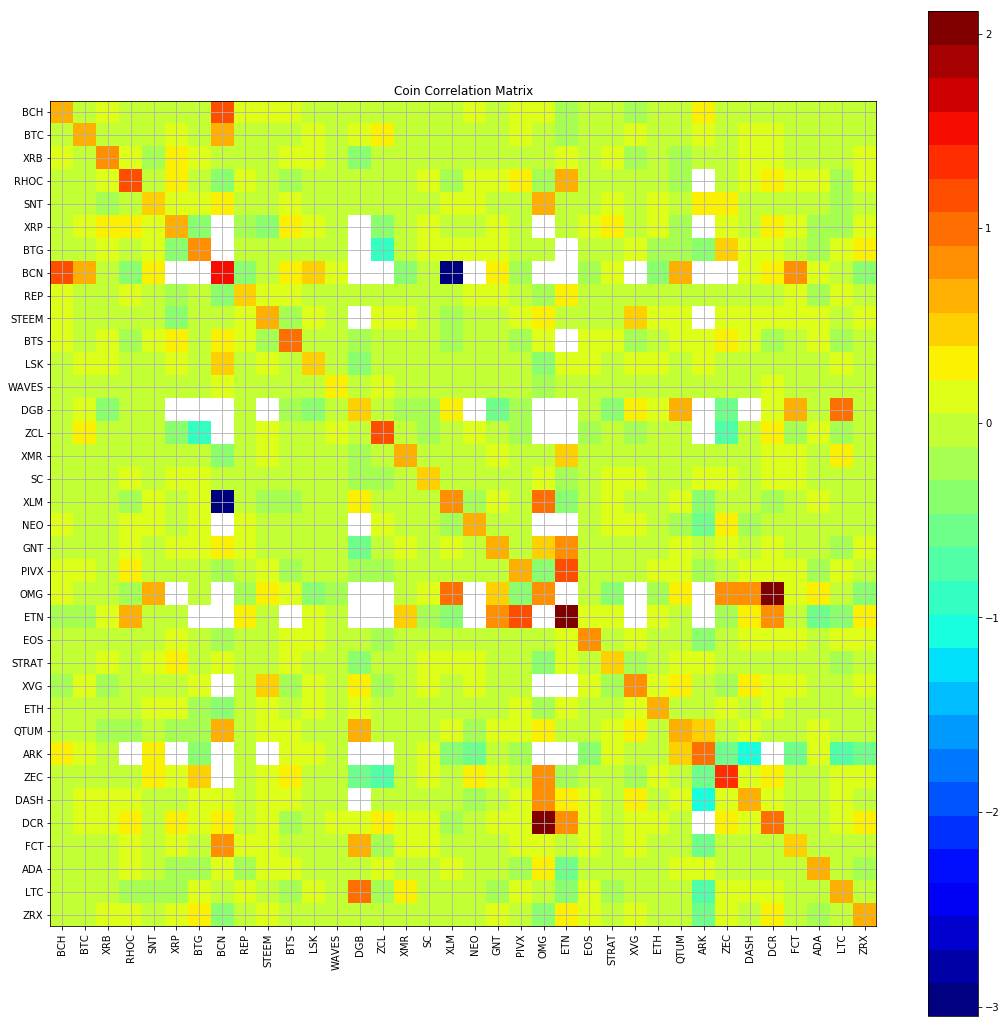

In [12]:
show_correlation_matrix(cov_df)

Euclidean / Ward


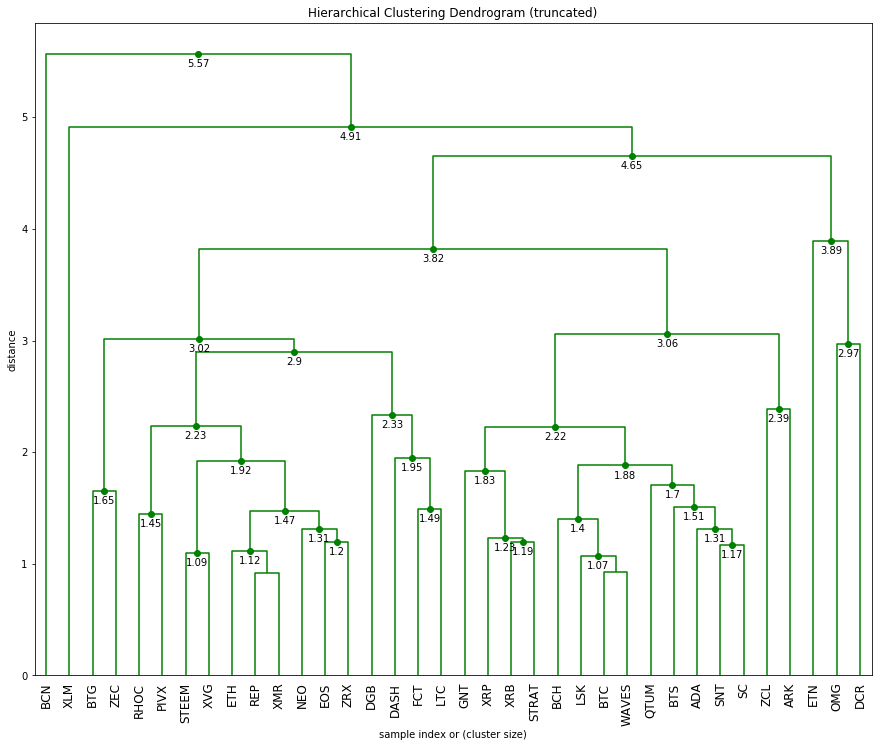

In [13]:
generate_clusters(cov_df)